# Titanic Project

In [144]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [145]:
# Loading the dataset
df = pd.read_csv("titanic.csv")

In [146]:
# Display basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
# Checking Null values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Handling Missing Values

In [148]:
# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)

/var/folders/lb/nsxdyvjn1gv8wmpplxpvzz000000gn/T/ipykernel_64900/1001106731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [149]:
# fill missing values with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/var/folders/lb/nsxdyvjn1gv8wmpplxpvzz000000gn/T/ipykernel_64900/4090513234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [150]:
df.drop(columns=["Cabin"], inplace=True)  # Too many missing values

In [151]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering

In [152]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df.drop(columns=["SibSp", "Parch"], inplace=True)  # Dropping the original columns

In [153]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)  # Irrelevant columns

In [154]:
# Convert categorical variables
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

## Exploratory Data Analysis (EDA)

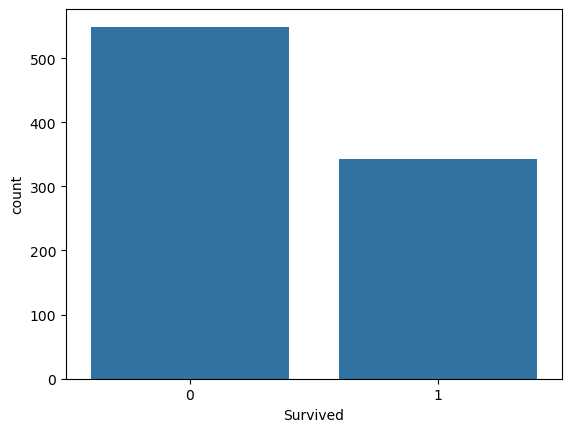

In [155]:
sns.countplot(x="Survived", data=df)
plt.show()

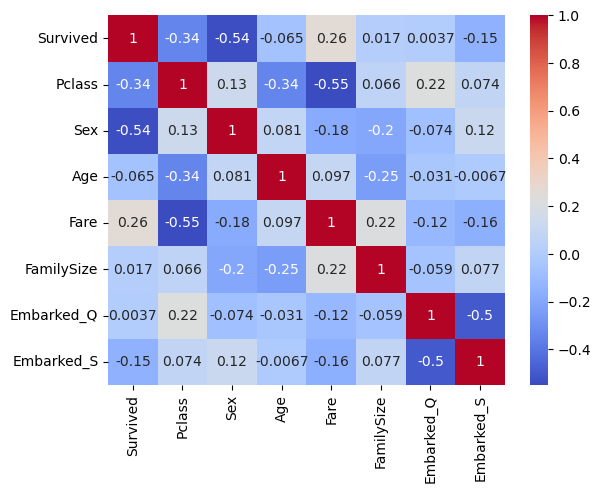

In [156]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

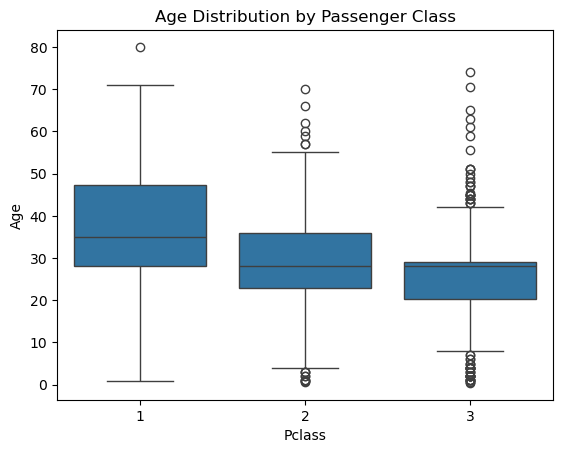

In [157]:
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

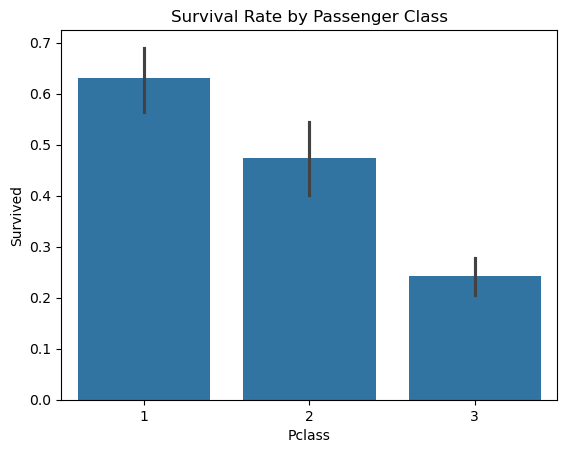

In [158]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

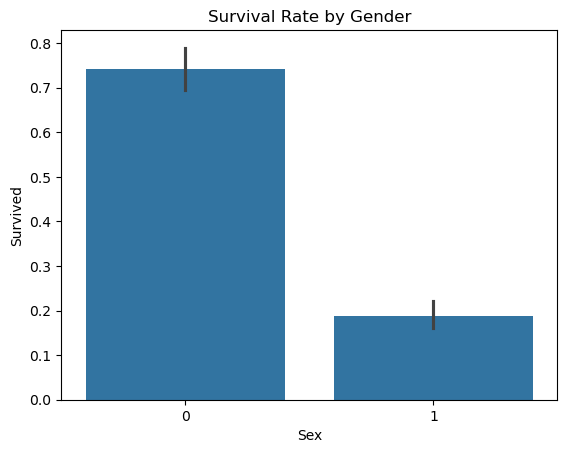

In [159]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

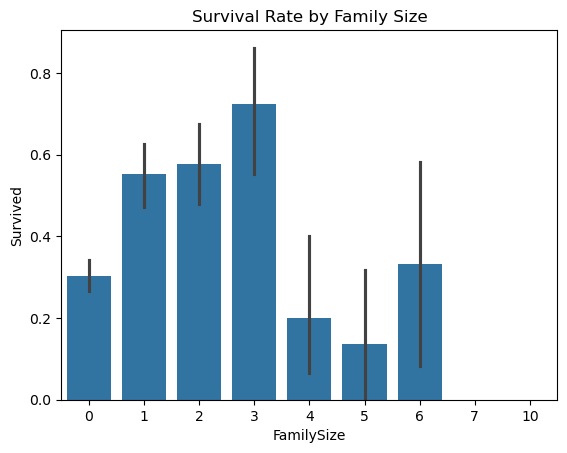

In [160]:
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.show()

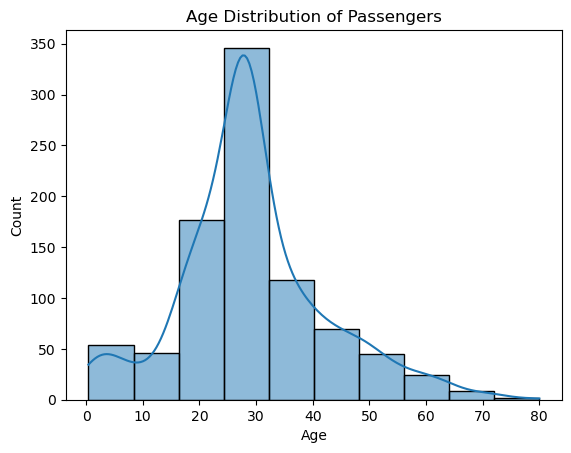

In [161]:
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

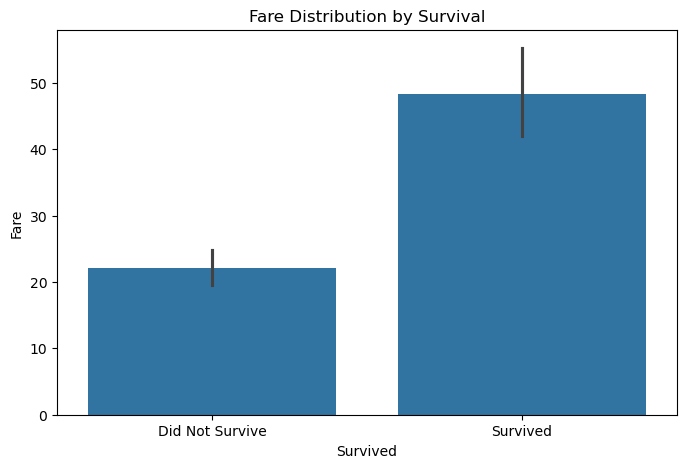

In [162]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()

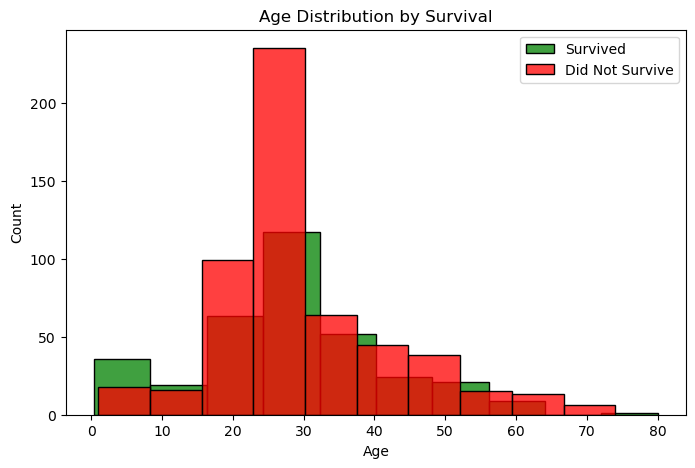

In [163]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Survived"] == 1]["Age"], bins=10, color="green", label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=10, color="red", label="Did Not Survive")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

## Splitting data into train and test sets

In [164]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training (Random Forest Classifier)

In [166]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

In [167]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


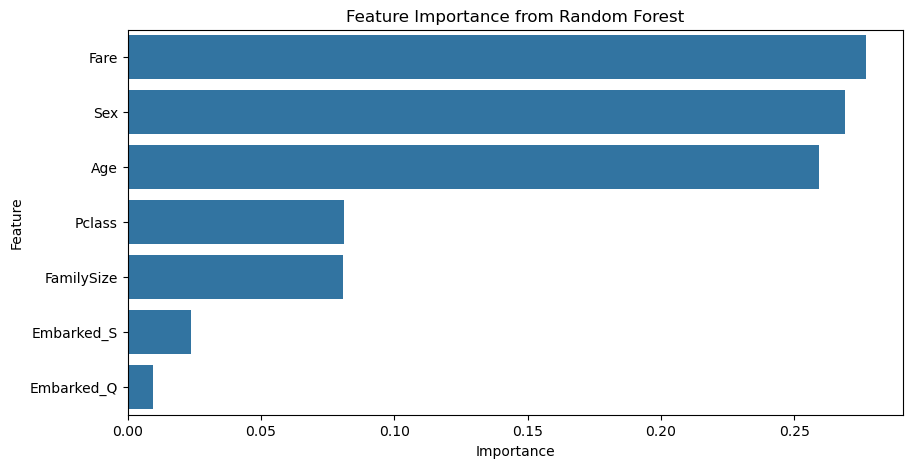

In [168]:
importances = model.feature_importances_
feature_names = X.columns

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.title("Feature Importance from Random Forest")
plt.show()

## Key Insights

1. **Gender played a crucial role** – Females had a significantly higher survival rate than males.  
2. **Passenger class impacted survival** – First-class passengers had the highest survival rate, while third-class had the lowest.  
3. **Age distribution varied by class** – First-class passengers were generally older, while third-class had a younger demographic.  
4. **Family size and survival** – Small families had better survival rates, while individuals and large families had lower chances of survival.  
5. **Age and survival trends** – Children had a higher survival advantage, while older adults had lower survival rates. Most passengers were in their 20s-30s, but a large portion did not survive.  
6. **Key features for prediction** – Fare, Sex, and Age were the most important factors in the Random Forest model.  